# Text Classification

#### 20-newgroup dataset is a collection of newsgroups in 20 topics. Fetch 20-newsgroup dataset.

In [97]:
import string
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [42]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kaushal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from sklearn.datasets import fetch_20newsgroups
bunch = fetch_20newsgroups()

#### Pre-process the dataset: Convert to lowercase, remove punctuations, symbols, and stopwords.

In [62]:
tokenizer = RegexpTokenizer('[a-zA-Z][a-zA-Z]+')
stop_words = stopwords.words('english')

token_corp = []
data = []
for d in bunch.data:
    tokens = tokenizer.tokenize(d)
    tokens = [word.lower() for word in tokens if word not in stop_words]
    token_corp.append(tokens)
    data.append(" ".join(tokens))


In [63]:
print(data[0])
# corpus
print(token_corp[0])

from lerxst wam umd edu thing subject what car nntp posting host rac wam umd edu organization university maryland college park lines wondering anyone could enlighten car saw day it door sports car looked late early it called bricklin the doors really small in addition front bumper separate rest body this know if anyone tellme model name engine specs years production car made history whatever info funky looking car please mail thanks il brought neighborhood lerxst
['from', 'lerxst', 'wam', 'umd', 'edu', 'thing', 'subject', 'what', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'anyone', 'could', 'enlighten', 'car', 'saw', 'day', 'it', 'door', 'sports', 'car', 'looked', 'late', 'early', 'it', 'called', 'bricklin', 'the', 'doors', 'really', 'small', 'in', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'this', 'know', 'if', 'anyone', 'tellme', 'model', 'name', 'engine', 'specs', 'y

#### Convert the words in the dataset to vectors of dimension 100 using Word2Vec. Ignore words whose frequency is less than 10.

In [61]:
import gensim
from gensim import corpora, models, similarities

In [72]:
model = gensim.models.Word2Vec(token_corp, min_count=10, size = 100)

#### Vocabulary size

In [73]:
print("Vocabulary Size: {}".format(len(model.wv.vocab)))

Vocabulary Size: 18159


#### Find the most similar words in the corpus to the word “car” along with their similarities.

In [88]:
print(*model.wv.most_similar('car'), sep="\n")

('cars', 0.8846904635429382)
('tires', 0.8513389825820923)
('bike', 0.8468177318572998)
('truck', 0.8303914666175842)
('dealer', 0.8256232738494873)
('owner', 0.8205631375312805)
('bikes', 0.809188961982727)
('honda', 0.8055466413497925)
('bought', 0.8047472834587097)
('toyota', 0.8018370866775513)


#### Find top 5 words similar to the following operations:

* girl + father - boy
* sports - bat + ball

In [86]:
print(*model.wv.most_similar(positive=['girl', 'father'], negative=['boy']), sep="\n")

('son', 0.8516300916671753)
('mother', 0.843051016330719)
('miracles', 0.8179592490196228)
('spirit', 0.8175290822982788)
('empty', 0.8152676224708557)
('sister', 0.8142035603523254)
('holy', 0.8112156391143799)
('risen', 0.8057224154472351)
('believed', 0.802990198135376)
('his', 0.8017452955245972)


In [87]:
print(*model.wv.most_similar(positive=['sports', 'ball'], negative=['bat']), sep="\n")

('tonight', 0.8668610453605652)
('morning', 0.8158824443817139)
('sharks', 0.8068385124206543)
('night', 0.7935193181037903)
('playoffs', 0.7929466962814331)
('league', 0.7889211177825928)
('quebec', 0.7885714769363403)
('saturday', 0.7876542806625366)
('sunday', 0.786758303642273)
('played', 0.780249297618866)


#### Create a TSNE plot for the top 20 words similar to each of the words [‘baseball’, ‘software’, ‘police’, ‘government’, ‘circuit’, ‘car’].

In [124]:
words = ['baseball', 'software', 'police', 'government', 'circuit', 'car']

plot_words = copy.deepcopy(words)

for w in words:
    t = [tup[0] for tup in model.wv.most_similar(w, topn=20)]
    plot_words.extend(t)

print(*plot_words, sep=', ')

baseball, software, police, government, circuit, car, espn, hockey, fans, nhl, players, braves, stats, playoff, game, phillies, playoffs, detroit, pens, sport, team, league, coach, watching, tonight, teams, hardware, machines, macintosh, graphics, multimedia, solutions, network, workstations, amiga, computers, packages, vendor, support, applications, platforms, product, sells, interactive, electronics, silicon, concealed, officers, income, cops, tax, governments, guard, armed, federal, officials, taxes, officer, citizen, insurance, funds, passed, weapon, lawyers, aid, criminal, citizens, interests, authorities, agencies, agents, citizen, legal, legitimate, protect, intensify, federal, restrictions, governments, private, nsa, protecting, experts, elected, conversations, administration, frequency, capability, resolution, inputs, signals, filter, components, connections, sampling, volt, feature, configuration, amp, enable, storage, signal, installation, receiver, input, controls, cars, ti

/home/kaushal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


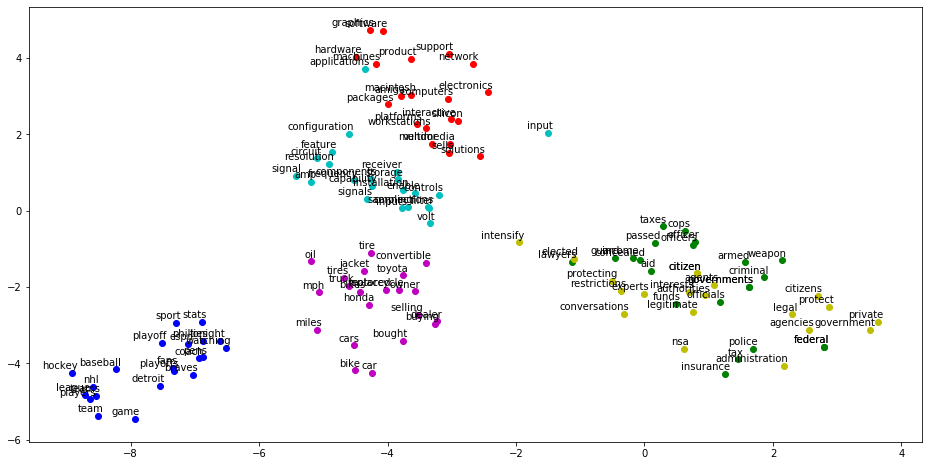

In [125]:
labels = []
tokens = []
color_lst = ['b', 'r', 'g', 'y', 'c', 'm']

for word in plot_words:
    tokens.append(model[word])
    labels.append(word)

# tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3000)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 8)) 
for i in range(len(x)):
    res = map(model.wv.similarity, [labels[i] for j in range(len(words))], words)
    t = np.argmax(list(res))
    plt.scatter(x[i],y[i], c=color_lst[t])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()